In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Step 1: Load Dataset

In [47]:
dataset = pd.read_csv(r"insurance_corrupted.csv")
df = pd.DataFrame(dataset)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,NaN,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,NaN,no,northwest,21984.47061
4,32,male,28.880,NaN,no,northwest,3866.85520


## Step 2: Check for Missing Values

In [48]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age         0
sex         0
bmi         1
children    6
smoker      0
region      0
charges     0
dtype: int64


## Step 3: Extract Features and Target

In [49]:
A = df.iloc[:, :-1].values  # Features (all columns except last)
B = df.iloc[:, -1].values   # Target (last column)

print("Features shape:", A.shape)
print("Target shape:", B.shape)
print("\nFeatures (first 3 rows):")
print(A[:3])
print("\nTarget (first 5 values):")
print(B[:5])

Features shape: (1338, 6)
Target shape: (1338,)

Features (first 3 rows):
[[19 'female' nan nan 'yes' 'southwest']
 [18 'male' 33.77 1.0 'no' 'southeast']
 [28 'male' 33.0 3.0 'no' 'southeast']]

Target (first 5 values):
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


## Step 4: Handle Missing Values with Imputation

In [50]:
print("=== BEFORE Imputation ===")
print("Features with NaN:")
print(A[:5])

# Use SimpleImputer to fill missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(A[:, [0, 2, 3]])  # Fit on numeric columns (age, bmi, children)
A[:, [0, 2, 3]] = imputer.fit_transform(A[:, [0, 2, 3]])
A[:, 3] = A[:, 3].astype(int)  # Convert children column to integer

print("\n=== AFTER Imputation ===")
print("Features (no NaN):")
print(A[:5])

=== BEFORE Imputation ===
Features with NaN:
[[19 'female' nan nan 'yes' 'southwest']
 [18 'male' 33.77 1.0 'no' 'southeast']
 [28 'male' 33.0 3.0 'no' 'southeast']
 [33 'male' 22.705 nan 'no' 'northwest']
 [32 'male' 28.88 nan 'no' 'northwest']]

=== AFTER Imputation ===
Features (no NaN):
[[19.0 'female' 30.66546372475692 1 'yes' 'southwest']
 [18.0 'male' 33.77 1 'no' 'southeast']
 [28.0 'male' 33.0 3 'no' 'southeast']
 [33.0 'male' 22.705 1 'no' 'northwest']
 [32.0 'male' 28.88 1 'no' 'northwest']]


## Step 5: Label Encoding for Categorical Variables

Convert categorical string values to numeric integers using LabelEncoder.

In [51]:
print("=== BEFORE Label Encoding ===")
print("Data type:", A.dtype)
print("Features (first 3 rows):")
for i in range(3):
    print(f"  Row {i}: {A[i]}")
#DUMB MOVE COMMENTED 
# print("\nTarget (first 5 values):")
# print(B[:5])

# Create a float64 array to store encoded data
A_encoded = np.zeros((A.shape[0], A.shape[1]), dtype=np.float64)

# Copy numeric columns (0, 2, 3) - age, bmi, children
A_encoded[:, [0, 2, 3]] = A[:, [0, 2, 3]].astype(float)

# Encode categorical columns using LabelEncoder
le_sex = LabelEncoder()
A_encoded[:, 1] = le_sex.fit_transform(A[:, 1])  # 'sex' column (male/female -> 0/1)

le_smoker = LabelEncoder()
A_encoded[:, 4] = le_smoker.fit_transform(A[:, 4])  # 'smoker' column (yes/no -> 0/1)

le_region = LabelEncoder()
A_encoded[:, 5] = le_region.fit_transform(A[:, 5])  # 'region' column (4 regions -> 0/1/2/3)

# Encode target variable
le_target = LabelEncoder()
B_encoded = le_target.fit_transform(B)

# Update arrays with encoded versions
A = A_encoded
# B = B_encoded

print("\n=== AFTER Label Encoding ===")
print("Data type:", A.dtype)
print("Features (first 3 rows):")
for i in range(3):
    print(f"  Row {i}: {A[i]}")
#print("\nTarget (first 5 values):")
# print(B[:5])

=== BEFORE Label Encoding ===
Data type: object
Features (first 3 rows):
  Row 0: [19.0 'female' 30.66546372475692 1 'yes' 'southwest']
  Row 1: [18.0 'male' 33.77 1 'no' 'southeast']
  Row 2: [28.0 'male' 33.0 3 'no' 'southeast']

=== AFTER Label Encoding ===
Data type: float64
Features (first 3 rows):
  Row 0: [19.          0.         30.66546372  1.          1.          3.        ]
  Row 1: [18.    1.   33.77  1.    0.    2.  ]
  Row 2: [28.  1. 33.  3.  0.  2.]


## Step 6: Train-Test Split

Split the data into training and test sets (80% train, 20% test).

In [52]:
print("=== Splitting the Dataset ===")
print(f"Before split: Total samples = {len(A)}")

A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.2, random_state=48)

print(f"After split:")
print(f"  Training samples = {len(A_train)}")
print(f"  Test samples = {len(A_test)}")
print(f"  A_train dtype: {A_train.dtype}")

print("\nTraining Features (first 3 rows):")
for i in range(3):
    print(f"  {A_train[i]}")

print("\nTest Features (first 3 rows):")
for i in range(3):
    print(f"  {A_test[i]}")

=== Splitting the Dataset ===
Before split: Total samples = 1338
After split:
  Training samples = 1070
  Test samples = 268
  A_train dtype: float64

Training Features (first 3 rows):
  [52.   0.  25.3  2.   1.   2. ]
  [20.    1.   35.31  1.    0.    2.  ]
  [28.    1.   38.06  0.    0.    2.  ]

Test Features (first 3 rows):
  [30.    1.   24.13  1.    0.    1.  ]
  [29.    1.   32.11  2.    0.    1.  ]
  [34.    0.   26.73  1.    0.    2.  ]


## Step 7: Feature Scaling with StandardScaler

Standardize features to have mean=0 and std=1. This improves model convergence and performance.

In [53]:
print("=== BEFORE Feature Scaling (StandardScaler) ===")
print("\nTraining Features (first 3 rows, raw values):")
for i in range(3):
    print(f"  {A_train[i]}")

print("\nTest Features (first 3 rows, raw values):")
for i in range(3):
    print(f"  {A_test[i]}")

# Apply StandardScaler
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

print("\n=== AFTER Feature Scaling (StandardScaler) ===")
print("\nTraining Features (first 3 rows, scaled values):")
for i in range(3):
    print(f"  {A_train_scaled[i]}")

print("\nTest Features (first 3 rows, scaled values):")
for i in range(3):
    print(f"  {A_test_scaled[i]}")

print("\n=== Scaler Statistics ===")
print(f"Feature Means: {scaler.mean_}")
print(f"Feature Standard Deviations: {scaler.scale_}")

print("\n=== Final Shapes ===")
print(f"A_train_scaled shape: {A_train_scaled.shape}")
print(f"A_test_scaled shape: {A_test_scaled.shape}")
print(f"b_train shape: {b_train.shape}")
print(f"b_test shape: {b_test.shape}")

=== BEFORE Feature Scaling (StandardScaler) ===

Training Features (first 3 rows, raw values):
  [52.   0.  25.3  2.   1.   2. ]
  [20.    1.   35.31  1.    0.    2.  ]
  [28.    1.   38.06  0.    0.    2.  ]

Test Features (first 3 rows, raw values):
  [30.    1.   24.13  1.    0.    1.  ]
  [29.    1.   32.11  2.    0.    1.  ]
  [34.    0.   26.73  1.    0.    2.  ]

=== AFTER Feature Scaling (StandardScaler) ===

Training Features (first 3 rows, scaled values):
  [ 0.91675007 -1.01317084 -0.88491459  0.73519548  1.93248888  0.43597443]
  [-1.3746232   0.98700038  0.78448136 -0.09199607 -0.5174674   0.43597443]
  [-0.80177988  0.98700038  1.24310661 -0.91918761 -0.5174674   0.43597443]

Test Features (first 3 rows, scaled values):
  [-0.65856905  0.98700038 -1.08003879 -0.09199607 -0.5174674  -0.46808107]
  [-0.73017447  0.98700038  0.25080833  0.73519548 -0.5174674  -0.46808107]
  [-0.37214739 -1.01317084 -0.64642945 -0.09199607 -0.5174674   0.43597443]

=== Scaler Statistics ===
F

In [54]:
# Summary of preprocessing steps completed
print("\n" + "=" * 60)
print("DATA PREPROCESSING PIPELINE SUMMARY")
print("="*60)
print(f"✓ Loaded dataset: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"✓ Handled missing values using Mean Imputation")
print(f"✓ Label Encoded 3 categorical columns (sex, smoker, region)")
print(f"✓ Split dataset: {len(A_train)} training, {len(A_test)} test")
print(f"✓ Applied StandardScaler feature normalization")
print(f"\nFinal datasets ready for modeling:")
print(f"  - A_train_scaled: {A_train_scaled.shape}")
print(f"  - A_test_scaled: {A_test_scaled.shape}")
print(f"  - b_train: {b_train.shape}")
print(f"  - b_test: {b_test.shape}")
print("=" * 60)


DATA PREPROCESSING PIPELINE SUMMARY
✓ Loaded dataset: 1338 samples, 7 columns
✓ Handled missing values using Mean Imputation
✓ Label Encoded 3 categorical columns (sex, smoker, region)
✓ Split dataset: 1070 training, 268 test
✓ Applied StandardScaler feature normalization

Final datasets ready for modeling:
  - A_train_scaled: (1070, 6)
  - A_test_scaled: (268, 6)
  - b_train: (1070,)
  - b_test: (268,)


# Linear Regression : Our Very First Model in ML

In [55]:
# Linear Regression Model
model = LinearRegression() # Let's create the model object using LinearRegression

model.fit(A_train_scaled, b_train)

print("Model trained successfully!")

Model trained successfully!


In [56]:
y_pred = model.predict(A_test_scaled)

print("First 10 predictions vs actual:")

# We create a DataFrame comparing the Actual Charges (b_test) against Predicted Charges (y_pred)
comparison = pd.DataFrame({
    "Actual Charges": b_test,
    "Predicted Charges": y_pred
})

# Display the first 10 rows
comparison.head(10)

First 10 predictions vs actual:


,Actual Charges,Predicted Charges
0,4032.24070,3928.116689
1,4433.91590,6800.006476
2,5002.78270,5456.545390
3,2855.43755,5381.511239
4,1712.22700,2574.651711
5,4746.34400,5444.453448
6,35491.64000,29679.471349
7,5846.91760,11846.828803
8,11881.96960,12124.531936
9,7537.16390,8671.034031


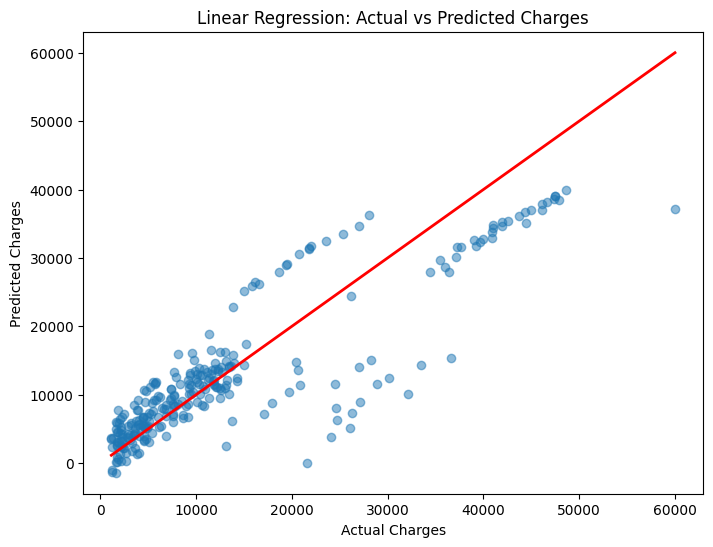

In [57]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(b_test, y_pred, alpha=0.5)
plt.plot([min(b_test), max(b_test)], [min(b_test), max(b_test)], color='red', linewidth=2) # Diagonal perfect fit line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error  


y_pred = model.predict(A_test_scaled)


mse = mean_squared_error(b_test, y_pred)  
print("Mean Squared Error:", mse)


rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 40050567.35672565
Root Mean Squared Error: 6328.551758240241


In [ ]:
from sklearn.metrics import r2_score
print("R2 score:", r2_score(b_test, y_pred))

R2 score: 0.7536828168210277
